# Sine Walk Frequency Analysis

## Overview
This Python script processes markdown and CSV files containing time (s), latitude, and longitude
data located in 'directory' folder. It extracts temperature data from markdown files, converts it
to Kelvin, and then uses CSV files for fitting, Fourier transforms (FFT), and inverse FFT processing.
The script generates plots of raw and fitted data, as well as their frequency components.

### Key Features:
- Extracts temperature from markdown files and converts it to Kelvin.
- Fits sine curves to CSV data and plots both raw and fitted data.
- Computes FFT for the fitted data and plots the frequency spectrum.
- Applies a low-pass filter to the FFT result and computes the inverse FFT.
- Generates three distinct plots:
  1. **Curve fitting of sinewalk data**: Shows raw data and sine wave fits.
  2. **FFT of Sinewalk Data**: Shows the frequency spectrum of the fitted data.
  3. **Inverse FFT of Filtered Data**: Displays the inverse FFT of the filtered frequencies.

### Requirements

To run this script, you need the following Python libraries:

- `numpy`
- `matplotlib`

### How to Run the Code

Click 'Execute cell' from the code block and the script will then ask for the following inputs:

- Enter a keyword to filter markdown files (or press Enter to skip):

Once you have entered the filter word for listing the markdown files, the code will execute. The script will process the markdown files, 
extracting temperature values and converting them to Kelvin. The extracted temperatures will be 
included in the plot legends. The script will fit each sinewalk CSV file's data to a sine wave and 
then compute the FFT of the fitted data. The raw data, the fitted curve, the FFT magnitude, and the 
inverse FFT of the filtered frequencies will be plotted in three separate figures.

## Sources
- ifft — SciPy v1.14.1 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.ifft.html
  * Explains the ifft function in SciPy, which computes the 1-D inverse discrete Fourier Transform (IDFT) of an input array. The ifft function is the inverse operation of the forward Fourier Transform (fft) and is used to reconstruct a time-domain signal from its frequency-domain representation.
- Discrete Fourier Transform (Numpy.FFT) — NUMPY v2.1 Manual. (n.d.). https://numpy.org/doc/2.1/reference/routines.fft.html
  * Provides an extensive overview of the Discrete Fourier Transform (DFT) in NumPy, focusing on its implementation in the numpy.fft module.
- re — Regular expression operations. (n.d.). Python Documentation. https://docs.python.org/3/library/re.html
  * Explains Python's re module, which provides tools for working with regular expressions (regex). It covers the module's purpose, basic usage, syntax, and some technical considerations.
- GeeksforGeeks. (2022, August 6). SCIPY | Curve fitting. GeeksforGeeks. https://www.geeksforgeeks.org/scipy-curve-fitting/
  * Explains curve fitting using Python's SciPy library, specifically the curve_fit() function from the scipy.optimize module.



Markdown files found:
1. pp17_sinewalk.md
2. pp20_sinewalk.md
3. pp04_sinewalk.md
4. pp14_sinewalk.md
5. pp18_sinewalk.md
6. pp01_sinewalk.md
7. pp08_sinewalk.md
8. pp02_sinewalk.md
9. pp11_sinewalk.md
10. pp13_sinewalk.md
11. pp12_sinewalk.md
12. pp05_sinewalk.md
13. pp03_sinewalk.md
14. pp15_sinewalk.md
15. pp09_sinewalk.md
16. pp06_sinewalk.md
17. pp10_sinewalk.md
18. pp07_sinewalk.md
19. pp19_sinewalk.md
20. pp16_sinewalk.md


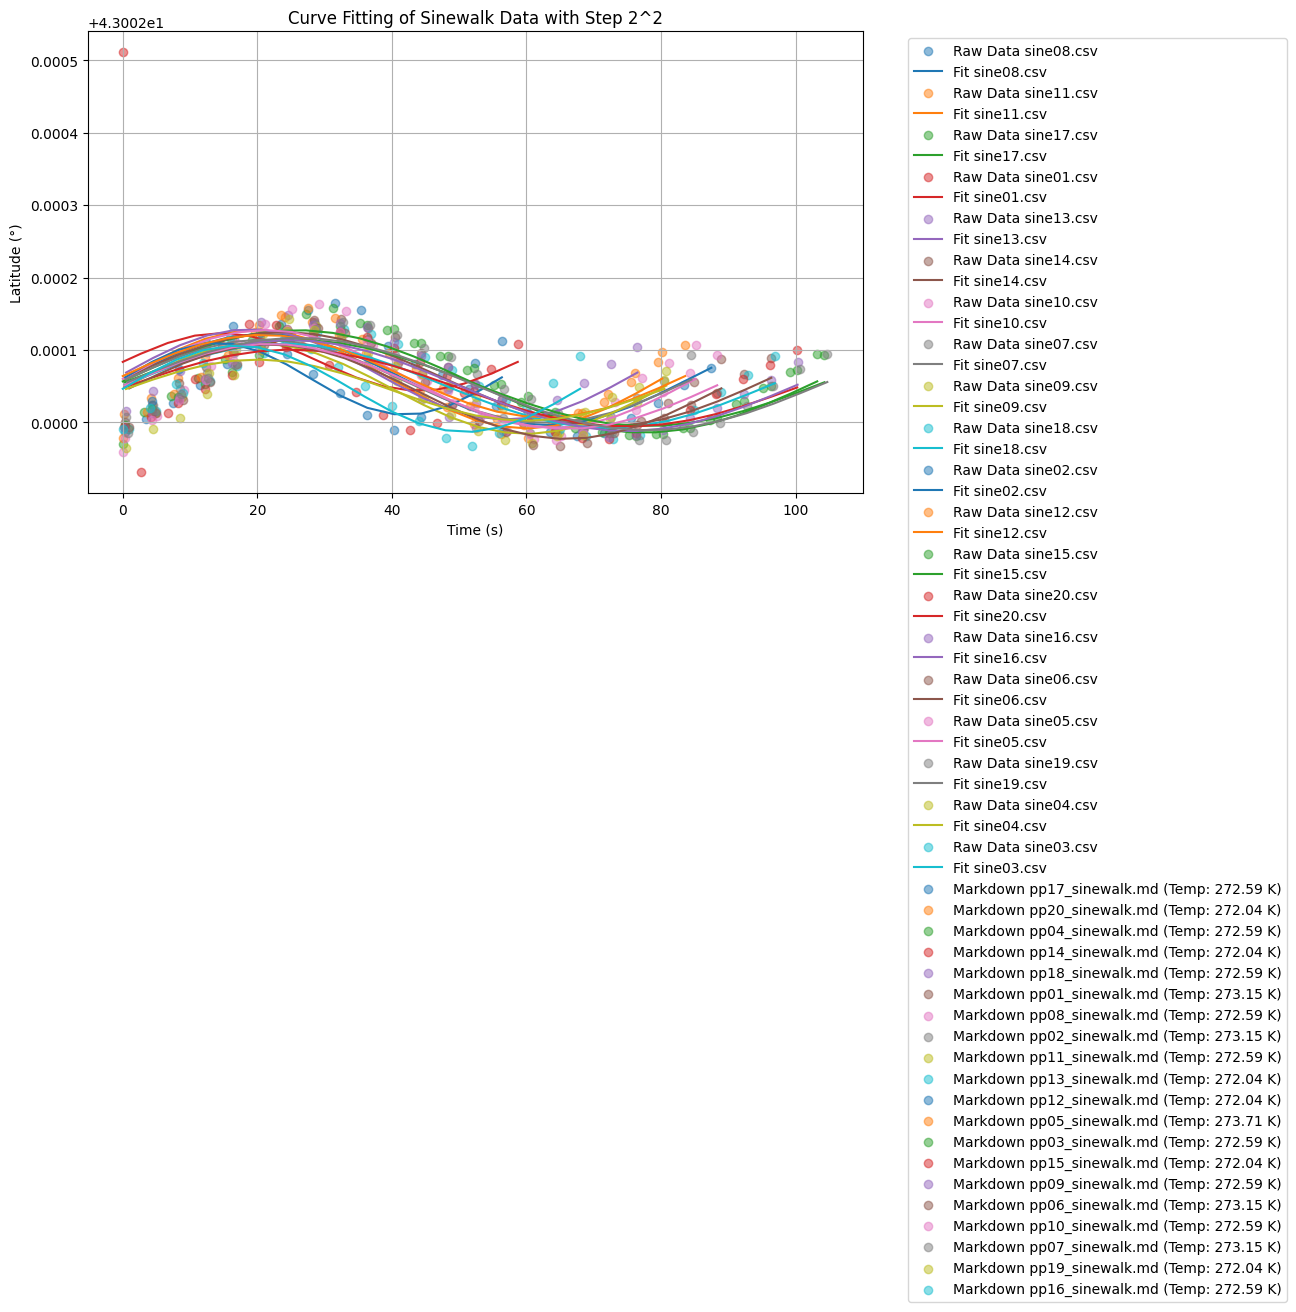

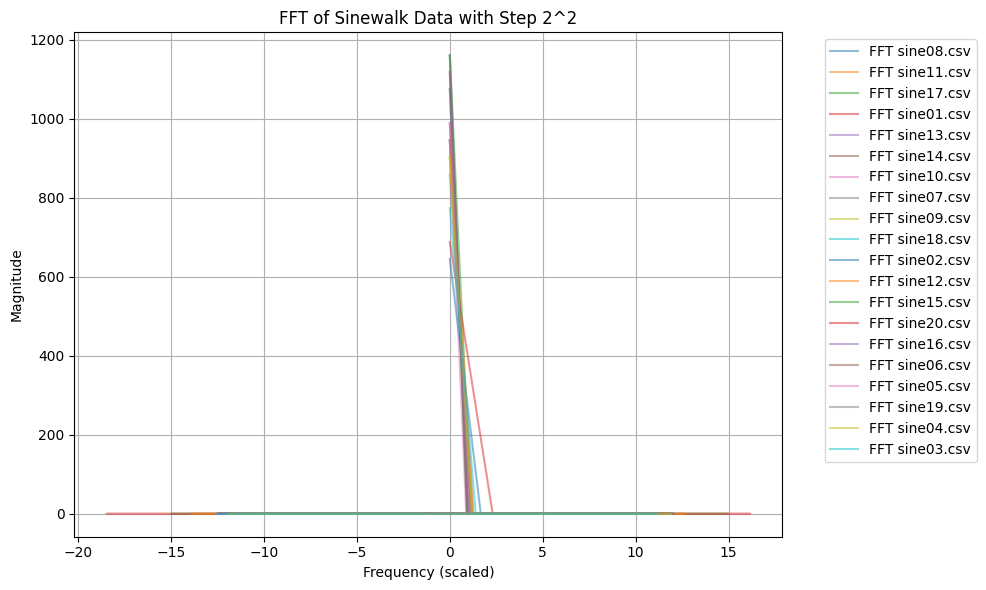

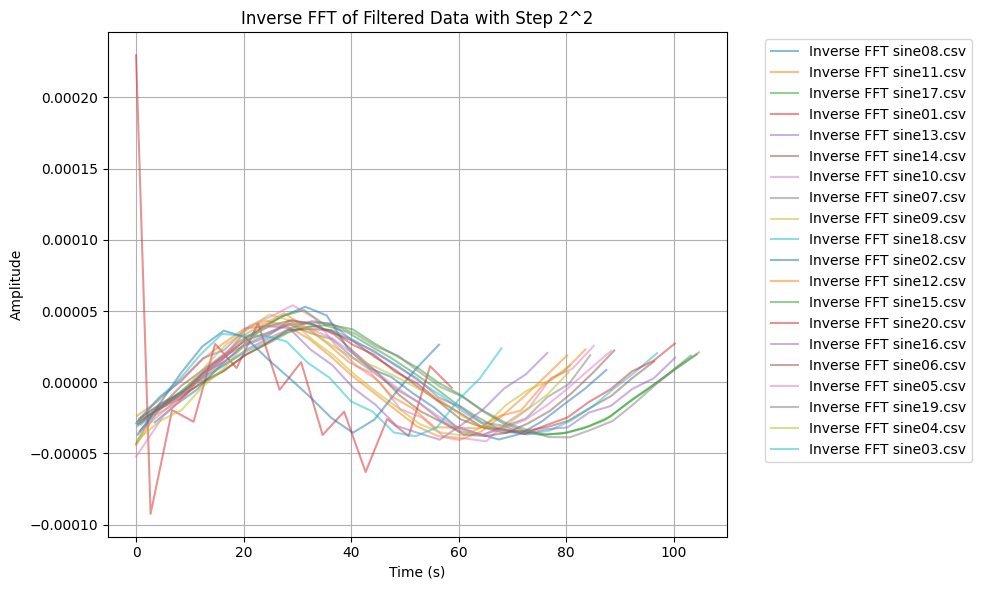

In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
sys.path.append('/workspaces/FORKCP1-24-final/p_pxmpo/code')

from final import load_csv_data, sine_model_function, fit_curve, extract_temperature_from_markdown, compute_fft, compute_inverse_fft

def plot_all_curves(directory_path, model_function, step_n=1, markdown_keyword=None):
    """Plot all curves from CSV files in a specified directory on separate plots."""
    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} does not exist.")
        return

    csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
    markdown_files = []

    keyword = input("Enter a keyword for filtering markdown files (leave blank to skip filtering): ")

    if keyword:
        markdown_files = [file for file in os.listdir(directory_path) if keyword in file and file.endswith(".md")]
    else:
        markdown_files = [file for file in os.listdir(directory_path) if file.endswith(".md")]

    if markdown_files:
        print("\nMarkdown files found:")
        for i, file in enumerate(markdown_files, 1):
            print(f"{i}. {file}")
    else:
        print("No markdown files found.")
        return

    # Curve Fitting Plot
    fig1, ax1 = plt.subplots(figsize=(10, 6))
    for file_name in csv_files:
        file_path = os.path.join(directory_path, file_name)
        try:
            x, y = load_csv_data(file_path)
            step = 2 ** step_n
            x_subset = x[::step]
            y_subset = y[::step]
            params = fit_curve(x_subset, y_subset, model_function)
            ax1.scatter(x_subset, y_subset, label=f'Raw Data {file_name}', alpha=0.5)
            ax1.plot(x_subset, model_function(x_subset, *params), label=f'Fit {file_name}')
        except Exception as e:
            print(f"Error fitting {file_name}: {e}")
    
    # Plot Markdown files
    for file_name in markdown_files:
        file_path = os.path.join(directory_path, file_name)
        try:
            temperatures = extract_temperature_from_markdown(file_path, markdown_keyword)
            if temperatures:
                plt.scatter([], [], label=f'Markdown {file_name} (Temp: {np.mean(temperatures):.2f} K)', alpha=0.5)
        except Exception as e:
            print(f"Error extracting temperature from {file_name}: {e}")

    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Latitude (°)')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.set_title(f'Curve Fitting of Sinewalk Data with Step 2^{step_n}')
    ax1.grid(True)

    # FFT Plot
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    for file_name in csv_files:
        file_path = os.path.join(directory_path, file_name)
        try:
            x, y = load_csv_data(file_path)
            step = 2 ** step_n
            x_subset = x[::step]
            y_subset = y[::step]
            fft_freq_scaled, fft_magnitude, _ = compute_fft(y_subset, x_subset)
            ax2.plot(fft_freq_scaled, fft_magnitude, label=f'FFT {file_name}', alpha=0.5)
        except Exception as e:
            print(f"Error computing FFT for {file_name}: {e}")
    ax2.set_xlabel('Frequency (scaled)')
    ax2.set_ylabel('Magnitude')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.set_title(f'FFT of Sinewalk Data with Step 2^{step_n}')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Inverse FFT Plot
    fig3, ax3 = plt.subplots(figsize=(10, 6))
    for file_name in csv_files:
        file_path = os.path.join(directory_path, file_name)
        try:
            # Load data and perform FFT
            x, y = load_csv_data(file_path)
            step = 2 ** step_n
            x_subset = x[::step]
            y_subset = y[::step]
            fft_freq_scaled, fft_magnitude, fft_result = compute_fft(y_subset, x_subset)
            
            # Apply a simple filter (e.g., keeping only low frequencies)
            filter_mask = fft_freq_scaled < np.median(fft_freq_scaled)
            inverse_fft = compute_inverse_fft(fft_result, filter_mask)

            # Plot the Inverse FFT result
            ax3.plot(x_subset, inverse_fft[:len(x_subset)], label=f'Inverse FFT {file_name}', alpha=0.5)
        except Exception as e:
            print(f"Error computing Inverse FFT for {file_name}: {e}")
    
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Amplitude')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.set_title(f'Inverse FFT of Filtered Data with Step 2^{step_n}')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

#Run the code
directory_path = '/workspaces/FORKCP1-24-final/p_pxmpo/data'
plot_all_curves(directory_path, sine_model_function, step_n=2, markdown_keyword='Temperature')
